In [209]:
import numpy as np
from numpy import array, random, dot, tanh, cos, sin
import math
import matplotlib.pyplot as plt
%matplotlib inline    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from google.colab import drive 
import dill
drive.mount('/content/drive')

path = '/content/drive/My Drive/DL/Assignment1/'
saved = True
r_seed = 7
#Generates dataset that conforms to the pattern in Q3
# instead of 1,0 labels are 1,-1
def generate_data():
  data = []
  for i in range(-30,30,2):
    if abs(i)%4 == 0:
      data.append([i,1, -1])
    else:
      data.append([i,1, 1])
  return array(data).reshape(-1,3)

X = generate_data()
# r_seed will make the random data replicable
random.seed(r_seed)
random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split(X[:,0:2], X[:,2])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


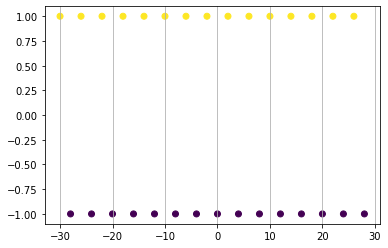

In [210]:
y = X[:,2]
plt.scatter(X[:,0],y, c=y)
axes = plt.gca()
axes.xaxis.grid()
plt.show()

In [211]:
# This class is reusable for any activation function, both the activation function and it's 
# derivate should passed as higher order functions
class NeuralNetwork:
  def __init__(self, fn, der_fn, learning_rate=0.01,epoch=1000, seed_val=r_seed):
    self.fn = fn
    self.der_fn = der_fn
    self.weight_matrix = 2 * random.random((1, 2)) - 1
    self.learning_rate = learning_rate
    self.epoch = epoch
    random.seed(seed_val)

  def train(self, X, y):
    N = len(X)  
    for i in range(self.epoch):
      error = 0
      for index in range(N):
        z = dot(X[index],self.weight_matrix.T)
        output = self.fn(z)
        error = y[index] - output
        # Below updates the weight using generalized delta rule
        self.weight_matrix += self.learning_rate*error*self.der_fn(z)*X[index]
      # for early stopping
      if error == 0:
        print('Early stopping... Model trained in {} epochs'.format(i+1))
        break
    return self

  def test(self, X):
    output = []
    for x in X:
      output.append(self.fn(dot(x,self.weight_matrix.T)))
    return array(output).reshape(-1,1)

In [212]:
# reusable function to plot.
def plot(x, y):
  plt.plot(x,y)
  plt.show()

Learnt weights are [[-0.02321425 -0.29468309]]
Train Accuracy 59.09090909090909
Test Accuracy 37.5
Dummy sample Accuracy 100.0


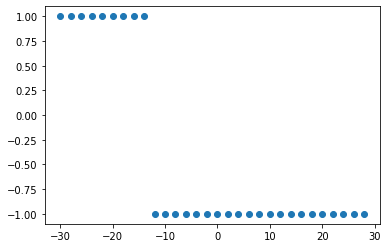

In [213]:
# f(x) = sigmoid(x), f'(x) = (sigmoid(x))(1-sigmoid(x))
def sigmoid_transform(output):
  return np.where(output>=0.5, 1, -1)

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def der_sigmoid(x):
  y = sigmoid(x)
  return y*(1-y)

filename = path + 'sigmoid.model'
if saved == True:
  model = joblib.load(filename)
else:
  model = NeuralNetwork(sigmoid, der_sigmoid)
  model = model.train(X_train, np.where(array(y_train).reshape(-1,1)==1, 1, 0))
  joblib.dump(model, filename)
print('Learnt weights are {}'.format(model.weight_matrix))
print('Train Accuracy {}'.format(accuracy_score(y_train, sigmoid_transform(model.test(X_train)))*100))
print('Test Accuracy {}'.format(accuracy_score(y_test, sigmoid_transform(model.test(X_test)))*100))
print('Dummy sample Accuracy {}'.format(accuracy_score([-1], sigmoid_transform(model.test([[200,1]])))*100))
plt.scatter(X[:,0], sigmoid_transform(model.test(X[:,0:2])))

Learnt weights are [[0.10434457 0.3381356 ]]
Train Accuracy 50.0
Test Accuracy 50.0
Dummy sample Accuracy 100.0


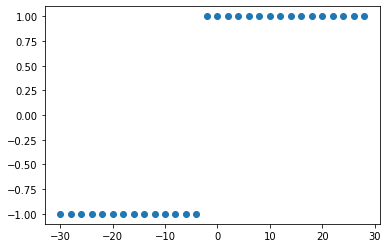

In [205]:
# f(x) = tanh(x), f'(x) = (1-tanh^2(x))
def tan_transform(output):
  return np.where(output>=0, 1, -1)

def tan(x):
  return tanh(x)

def der_tan(x):
  return 1 - tanh(x)**2
  
filename = path + 'tanh.model'
if saved == True:
  model = joblib.load(filename)
else:
  model = NeuralNetwork(tan, der_tan)
  model = model.train(X_train, y_train)
  joblib.dump(model, filename)

print('Learnt weights are {}'.format(model.weight_matrix))
print('Train Accuracy {}'.format(accuracy_score(y_train, tan_transform(model.test(X_train)))*100))
print('Test Accuracy {}'.format(accuracy_score(y_test, tan_transform(model.test(X_test)))*100))
print('Dummy sample Accuracy {}'.format(accuracy_score([1], tan_transform(model.test([[200,1]])))*100))
plt.scatter(X[:,0], tan_transform(model.test(X[:,0:2])))

Learnt weights are [[ 0.15855732 -8.32313963]]
Train Accuracy 54.54545454545454
Test Accuracy 37.5
Dummy sample Accuracy 0.0


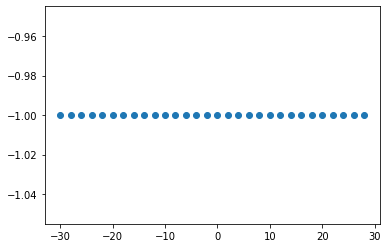

In [206]:
#relu
#  f(x) = x when x >=0 else 0
# f'(x) = 1 when x >=0 else 0
def relu_transform(output):
  return np.where(output>0, 1, -1)  

def relu(x):
  return x if x >= 0 else 0

def der_relu(x):
  return 1 if x >= 0 else 0

filename = path + 'relu.model'
if saved == True:
  model = joblib.load(filename)
else:
  model = NeuralNetwork(relu, der_relu)
  model = model.train(X_train, y_train)
  joblib.dump(model, filename)

print('Learnt weights are {}'.format(model.weight_matrix))
print('Train Accuracy {}'.format(accuracy_score(y_train, relu_transform(model.test(X_train)))*100))
print('Test Accuracy {}'.format(accuracy_score(y_test, relu_transform(model.test(X_test)))*100))
print('Dummy sample Accuracy {}'.format(accuracy_score([-1], relu_transform(model.test([[200,1]])))*100))
#plt.scatter(X_test[:,0], relu_transform(model.test(X_test)))
plt.scatter(X[:,0], relu_transform(model.test(X[:,0:2])))

Learnt weights are [[-1.57093784  0.06613848]]
Train Accuracy 100.0
Test Accuracy 100.0
Dummy sample Accuracy 100.0


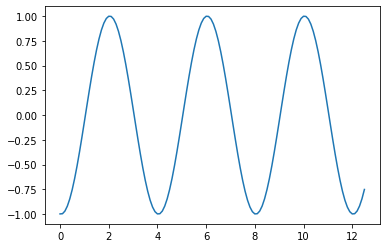

In [207]:
# f(x) = cos(x), f'(x) = -sin(x)
def cos_transform(output):
  return np.where(output>=0, 1, -1)    

def fn_cos(x):
  return -cos(x)

def der_cos(x):
  return sin(x)

filename = path + 'cosine.model'
if saved == True:
  model = joblib.load(filename)
else:
  model = NeuralNetwork(fn_cos, der_cos)
  model = model.train(X_train, y_train)
  joblib.dump(model, filename)

print('Learnt weights are {}'.format(model.weight_matrix))
print('Train Accuracy {}'.format(accuracy_score(y_train, cos_transform(model.test(X_train)))*100))
print('Test Accuracy {}'.format(accuracy_score(y_test, cos_transform(model.test(X_test)))*100))
print('Dummy sample Accuracy {}'.format(accuracy_score([-1], cos_transform(model.test([[200,1]])))*100))

x = np.arange(0,4*np.pi,0.1)
x_c = []
for i in range(len(x)):
  x_c.append([x[i], 1])
x_c = array(x_c).reshape(-1,2)
plot(x, fn_cos(dot(x_c, model.weight_matrix.T)))

Learnt weights are [[4.71253547 1.50175503]]
Train Accuracy 100.0
Test Accuracy 100.0
Dummy sample Accuracy 100.0


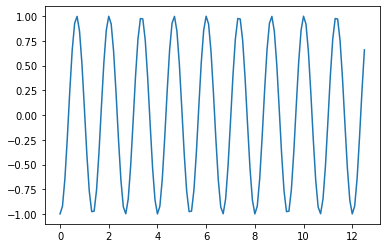

In [208]:
# f(x) = sin(x), f'(x) = cos(x)
def sine_transform(output):
  return np.where(output>=0, 1, -1)    

def fn_sin(x):
  return -sin(x)

def der_sin(x):
  return -cos(x)

filename = path + 'sine.model'
if saved == True:
  model = joblib.load(filename)
else:
  model = NeuralNetwork(fn_sin, der_sin)
  model = model.train(X_train, y_train)
  joblib.dump(model, filename)

print('Learnt weights are {}'.format(model.weight_matrix))
print('Train Accuracy {}'.format(accuracy_score(y_train, sine_transform(model.test(X_train)))*100))
print('Test Accuracy {}'.format(accuracy_score(y_test, sine_transform(model.test(X_test)))*100))
print('Dummy sample Accuracy {}'.format(accuracy_score([-1], sine_transform(model.test([[200,1]])))*100))

x = np.arange(0,4*np.pi,0.1)
x_c = []
for i in range(len(x)):
  x_c.append([x[i], 1])
x_c = array(x_c).reshape(-1,2)
plot(x, fn_sin(dot(x_c, model.weight_matrix.T)))